# Pymaceuticals Inc.

### Analysis
- Observed Trend 1:
- Observed Trend 2:
- Observed Trend 3:

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [44]:
clinical_data = "raw_data/clinicaltrial_data.csv"
clinical_data_df = pd.read_csv(clinical_data)
clinical_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
clinical_data_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.455258,1.021659
std,14.079460,8.888824,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.957919,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [70]:
# Mouse "g989"
clinical_data_df[clinical_data_df["Mouse ID"]=="g989"].count()

Mouse ID              13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [51]:
clinical_df = clinical_data_df.set_index("Mouse ID")

In [4]:
mouse_data = "raw_data/mouse_drug_data.csv"
mouse_data_df = pd.read_csv(mouse_data)
mouse_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [32]:
mouse_data_df.describe()

,Mouse ID,Drug
count,250,250
unique,249,10
top,g989,Stelasyn
freq,2,25


In [42]:
mouse_data_df[mouse_data_df["Mouse ID"]=="g989"]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [54]:
mouse_df = mouse_data_df.set_index("Mouse ID")

In [72]:
# Concatenating both tables mouse_data_df and clinical_data_df
# !It didnt work!!!!!!!!!!!!!!!!!
# clinic_mouse_concat = pd.concat([clinical_df, mouse_df], axis=1)
# clinic_mouse_concat

In [71]:
clinic_mouse_merge = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID", how="outer")
clinic_mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [68]:
# Mouse "g989" has been dupplicated because he has been taken 2 types of drugs
clinic_mouse_merge[clinic_mouse_merge["Mouse ID"]=="g989"].count()

Mouse ID              26
Timepoint             26
Tumor Volume (mm3)    26
Metastatic Sites      26
Drug                  26
dtype: int64

### Tumor Response to Treatment

In [78]:
# Grouping the merged table into Drug and Timepoint
grouped_drug_time = clinic_mouse_merge.groupby(['Drug', 'Timepoint'])
grouped_drug_time.count()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
          25               22                  22                22
          30               22                  22                22
          35               22                  22                22
          40               21                  21                21
          45               21                  21                21
Ceftamin  0                25                  25                25
          5                21                  21                21
          10               20                  20                20
          15               19                  19                19
          20               18                  18                18
          25               18                  18                18
          30               16                  16                16
          35               14                  14                14
          40               14                  14                14
          45               13                  13                13
Infubinol 0                25                  25                25
          5                25                  25                25
          10               21                  21                21
          15               21                  21                21
          20               20                  20                20
          25               18                  18                18
          30               17                  17                17
          35               12                  12                12
          40               10                  10                10
          45                9                   9                 9
...                       ...                 ...               ...
Ramicane  0                25                  25                25
          5                25                  25                25
          10               24                  24                24
          15               24                  24                24
          20               23                  23                23
          25               23                  23                23
          30               23                  23                23
          35               21                  21                21
          40               20                  20                20
          45               20                  20                20
Stelasyn  0                26                  26                26
          5                25                  25                25
          10               23                  23                23
          15               23                  23                23
          20               21                  21                21
          25               19                  19                19
          30               18                  18                18
          35               16                  16                16
          40               12                  12                12
          45               11                  11                11
Zoniferol 0                25                  25                25
          5                24                  24                24
          10               22                  22                22
          15               21                  21                21
          20               17                  17                17
          25               16                  16                16
         

In [76]:
tumor_vol_avrg = grouped_drug_time["Tumor Volume (mm3)"].mean()
tumor_vol_avrg

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [87]:
tumor_vol_df = tumor_vol_avrg.reset_index(level=['Drug','Timepoint'])
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [96]:
tumor_vol_df["Drug"].value_counts()

Naftisol     10
Placebo      10
Ketapril     10
Stelasyn     10
Ceftamin     10
Ramicane     10
Propriva     10
Capomulin    10
Infubinol    10
Zoniferol    10
Name: Drug, dtype: int64

In [160]:
# Make a pivot table
tumor_pivot = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [166]:
tumor_pivot.values[:,0]

array([45.        , 44.26608642, 43.08429058, 42.06431735, 40.71632532,
       39.93952783, 38.76933929, 37.81683888, 36.95800081, 36.2361138 ])

In [173]:
tumor_pivot.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [174]:
tumor_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [198]:
c = 0
volumen = []

10


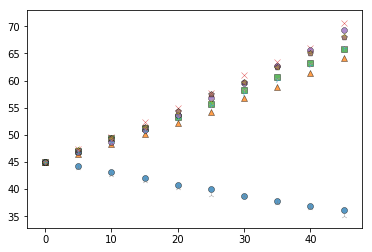

In [199]:
c = 0
marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"1", u"2", u"3", u"4"]
x_axis = tumor_pivot.index
for a in tumor_pivot.index:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = tumor_pivot.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=labels, edgecolors="black", alpha=0.75)
    c +=1
print(c)

10


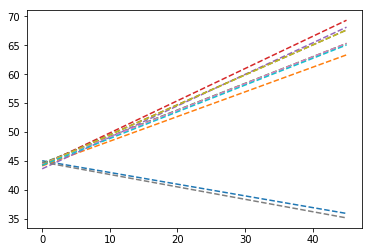

In [204]:
c=0
for a in tumor_pivot.index:
    #fig, ax = plt.subplots()
    # Set regression line
    y_axis = tumor_pivot.values[:,c]
    slope, intercept, *_ = linregress(x_axis, y_axis)
    fit = slope * x_axis + intercept
    plt.plot(x_axis, fit, '--')
    c +=1
print(c)

10


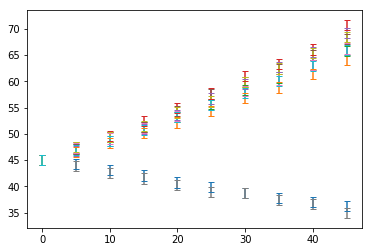

In [240]:
c=0
for a in tumor_pivot.index:
    #fig, ax = plt.subplots()
    # Set error bars
    y_axis = tumor_pivot.values[:,c]
    standard_errors = sem(tumor_pivot.values[:,0])
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3)
    #tumor_vol_df.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)', yerr=standard_errors)
#     slope, intercept, *_ = linregress(x_axis, y_axis)
#     fit = slope * x_axis + intercept
#     plt.plot(x_axis, fit, '--')
    c +=1
print(c)

0


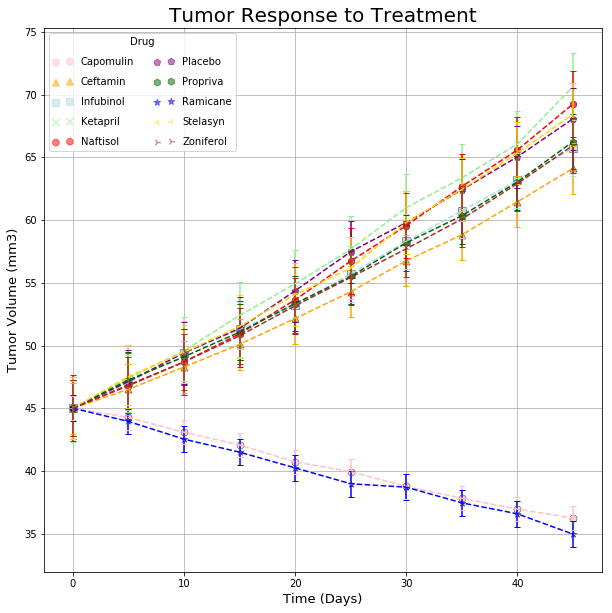

In [392]:

marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["pink", "orange", "lightblue", "lightgreen", "red", "purple", "darkgreen", "blue", "gold", "brown"]
x_axis = tumor_pivot.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in tumor_pivot.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

# Creating the scatterplot
c = 0
for a in tumor_pivot.index:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = tumor_pivot.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=labels, edgecolors="black", alpha=0.75, c=colors[c], s=50)

#     # Set regression line
#     y_axis = tumor_pivot.values[:,c]
#     slope, intercept, *_ = linregress(x_axis, y_axis)
#     fit = slope * x_axis + intercept
#     plt.plot(x_axis, fit, '--', c=colors[c])
    
    # Set error bars
    y_axis = tumor_pivot.values[:,c]
    standard_errors = sem(tumor_pivot.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])  
    c +=1
    
# Set the Titles
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Tumor Volume (mm3)", fontsize=13)
c = 0

leg_vol
print(c)

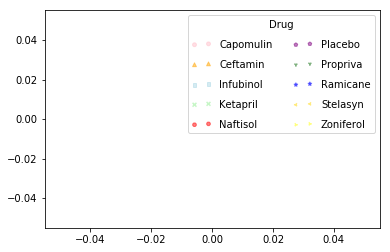

In [345]:
c = 0
for i in tumor_pivot.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=15, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

### Metastatic Response to Treatment

In [315]:
# From the group table we will get the mean of "Metastatic Sites"
tumor_met_avrg = grouped_drug_time["Metastatic Sites"].mean()
tumor_met_avrg

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
           25           1.500000
           30           1.937500
           35           2.071429
           40           2.357143
           45           2.692308
Infubinol  0            0.000000
           5            0.280000
           10           0.666667
           15           0.904762
           20           1.050000
           25           1.277778
           30           1.588235
           35           1.666667
           40           2.100000
           45         

In [316]:
tumor_met_df = tumor_met_avrg.reset_index(level=['Drug','Timepoint'])
tumor_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [317]:
metastatic_pivot = tumor_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


10


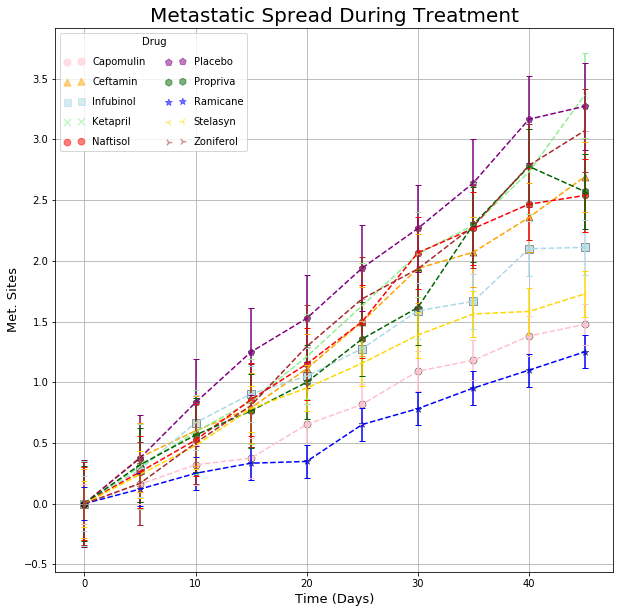

In [396]:

marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["pink", "orange", "lightblue", "lightgreen", "red", "purple", "darkgreen", "blue", "gold", "brown"]
x_axis = metastatic_pivot.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in metastatic_pivot.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

c = 0
for a in metastatic_pivot.index:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = metastatic_pivot.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=labels, edgecolors="black", alpha=0.75, c=colors[c], s=50)

#     # Set regression line
#     y_axis = tumor_pivot.values[:,c]
#     slope, intercept, *_ = linregress(x_axis, y_axis)
#     fit = slope * x_axis + intercept
#     plt.plot(x_axis, fit, '--', c=colors[c])
    
    # Set error bars
    y_axis = metastatic_pivot.values[:,c]
    standard_errors = sem(metastatic_pivot.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])  
    c +=1
    
# Set the Titles
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Met. Sites", fontsize=13)
print(c)

### Survival Rates

In [364]:
# From the group table we will get the mean of "Metastatic Sites"
surv_rate = grouped_drug_time["Mouse ID"].count()
surv_rate

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
           25           18
           30           16
           35           14
           40           14
           45           13
Infubinol  0            25
           5            25
           10           21
           15           21
           20           20
           25           18
           30           17
           35           12
           40           10
           45            9
                        ..
Ramicane   0            25
           5            25
           10           24
           15           24
           20           23
       

In [365]:
# Renaming the series
surv_rate = surv_rate.rename("Mouse Count")
surv_rate

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
           25           18
           30           16
           35           14
           40           14
           45           13
Infubinol  0            25
           5            25
           10           21
           15           21
           20           20
           25           18
           30           17
           35           12
           40           10
           45            9
                        ..
Ramicane   0            25
           5            25
           10           24
           15           24
           20           23
       

In [366]:
surv_rate_df = surv_rate.reset_index(level=['Drug','Timepoint'])
surv_rate_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [367]:
survival_pivot = surv_rate_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


10


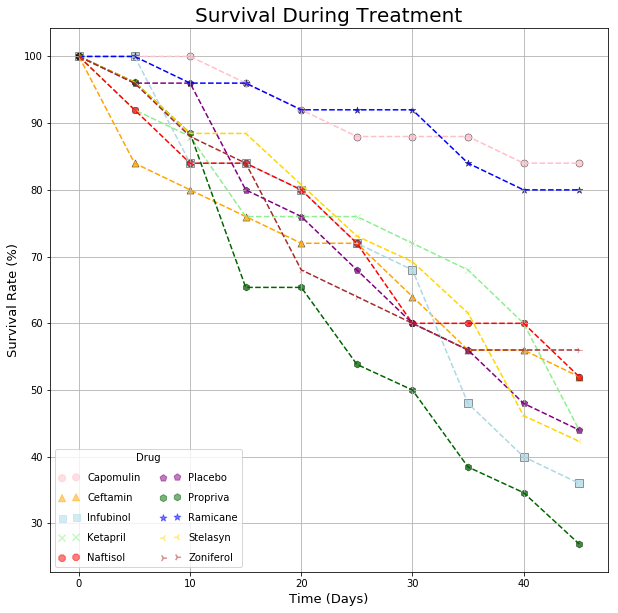

In [386]:
marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["pink", "orange", "lightblue", "lightgreen", "red", "purple", "darkgreen", "blue", "gold", "brown"]
x_axis = survival_pivot.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in survival_pivot.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

c = 0
for a in metastatic_pivot.index:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = (survival_pivot.values[:,c]/survival_pivot.values[0,c])*100
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=labels, edgecolors="black", alpha=0.75, c=colors[c], s=50)
    
    # Set error bars
    y_axis = (survival_pivot.values[:,c]/survival_pivot.values[0,c])*100
    standard_errors = sem(survival_pivot.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])
    plt.errorbar(x_axis, y_axis, linestyle='--', c=colors[c]) 
    c +=1
    
# Set the Titles
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Survival Rate (%)", fontsize=13)
print(c)

### Summary Bar Graph

In [399]:
# Calculating the % Tumor Change for each drug across the full 45 days
#Ultimo menos el primero entre el primero (volumen del tumor)


In [444]:
tumor_chg = []
colum_drug = []
c = 0
for i in tumor_pivot.columns:
    first_val = tumor_pivot.values[0,c]
    last_val = tumor_pivot.values[9,c]
    tum_chg = round(((last_val - first_val)/first_val)*100,2)
#     print(first_val)
#     print(last_val)
    print(tum_chg)
    tumor_chg.append(tum_chg)
    colum_drug.append(i)
    #tumor_chg.append([i,tum_chg])
    #tumor_chg.append({i:tum_chg})
    c+=1

-19.48
42.52
46.12
57.03
53.92
51.3
47.24
-22.32
52.09
46.58


In [443]:
tumor_chg

[-19.48, 42.52, 46.12, 57.03, 53.92, 51.3, 47.24, -22.32, 52.09, 46.58]

In [445]:
colum_drug

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

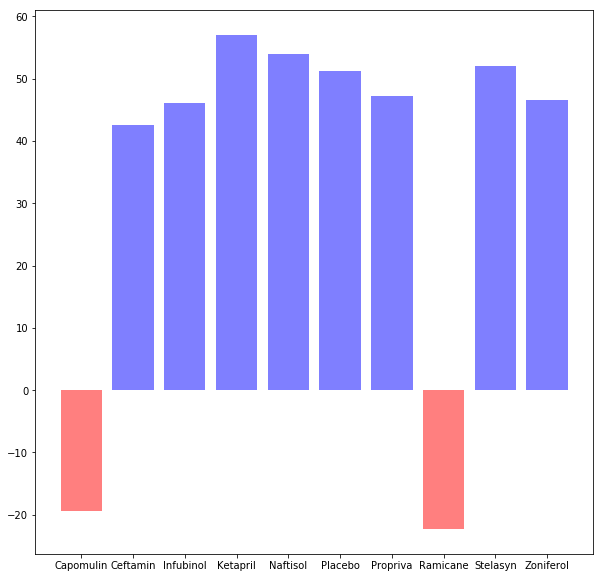

In [480]:
plt.figure(figsize=(10,10))
c=0
for i in tumor_pivot.columns:
    if tumor_chg[c]>0:
        plt.bar(colum_drug[c], tumor_chg[c], color='b', alpha=0.5, align="center")
    if tumor_chg[c]<0:
        plt.bar(colum_drug[c], tumor_chg[c], color='r', alpha=0.5, align="center")
    c+=1

In [474]:
c=0
for i in tumor_pivot.columns:
    if tumor_chg[c]<0:
        print("si!")
    c+=1

si!
si!


In [232]:
standard_errors

0.9709032345000089

In [180]:
y_axis

array([45.        , 46.85181827, 48.68988143, 50.77905905, 53.17033369,
       55.43293487, 57.71353092, 60.08937222, 62.91669188, 65.96088789])

In [117]:
x_axis = tumor_vol_df["Timepoint"]
y_axis = tumor_vol_df["Tumor Volume (mm3)"]
labels = tumor_vol_df["Drug"]
marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"1", u"2", u"3", u"4"]

Text(0.5,0.98,'Tumor Response to Treatment')

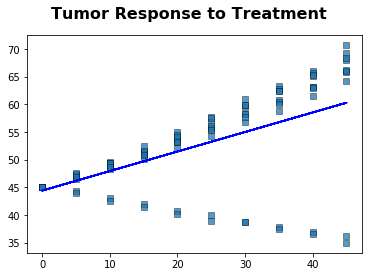

In [139]:
# Set regression line
slope, intercept, *_ = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept


fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, marker="s", linewidth=0.5, label=labels, edgecolors="black", alpha=0.75)
ax.plot(x_axis, fit, 'b--')

#Title
fig.suptitle("Tumor Response to Treatment", fontsize=16, fontweight="bold")

In [140]:
for x, y, m in x_axis, y_axis, marker:
    plt.scatter(x, y, marker=m, edgecolors="black", alpha=0.75)
plt.show()

ValueError: too many values to unpack (expected 3)

In [141]:
for x, y in x_axis, y_axis:
    slope, intercept, *_ = linregress(x, y)
    fit = slope * x + intercept
plt.show()

ValueError: too many values to unpack (expected 2)

In [149]:
a = tumor_vol_df[tumor_vol_df["Drug"]=="Naftisol"]["Timepoint"]
b = tumor_vol_df[tumor_vol_df["Drug"]=="Naftisol"]["Tumor Volume (mm3)"]

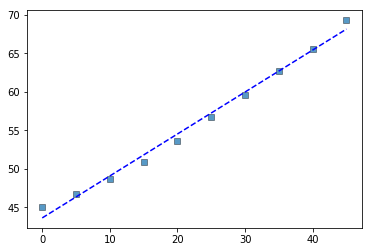

In [154]:
fig, ax = plt.subplots()
slope, intercept, *_ = linregress(a, b)
ax.scatter(a, b, marker="s", linewidth=0.5, label=labels, edgecolors="black", alpha=0.75)
fit = slope * a + intercept

ax.plot(a, fit, 'b--')

In [223]:
means = np.mean(b)
means

55.891023645458006

In [156]:
means = [np.mean(s) for s in b]
standard_errors = [sem(s) for s in b]
standard_errors

C:\Users\karol\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\karol\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
df.plot(kind='scatter', x="Sample Number", y="Population of People Voting Republican", yerr="sem")

In [207]:
tumor_pivot.values[:,0]

array([45.        , 44.26608642, 43.08429058, 42.06431735, 40.71632532,
       39.93952783, 38.76933929, 37.81683888, 36.95800081, 36.2361138 ])

In [210]:
type(means)

list

In [213]:
test = Arrays.asList(tumor_pivot.values[:,0])

NameError: name 'Arrays' is not defined

In [218]:
val = tumor_pivot.values[:,0].tolist()
val

[45.0,
 44.26608641544399,
 43.08429058188399,
 42.0643173468125,
 40.71632532212173,
 39.939527826868186,
 38.76933928855454,
 37.81683888251364,
 36.958000810895236,
 36.23611379944763]

In [222]:
standard_errors = sem(tumor_pivot.values[:,0])
standard_errors

0.9709032345000089

In [220]:
means = [np.mean(s) for s in val]
means

[45.0,
 44.26608641544399,
 43.08429058188399,
 42.0643173468125,
 40.71632532212173,
 39.939527826868186,
 38.76933928855454,
 37.81683888251364,
 36.958000810895236,
 36.23611379944763]